In [27]:
import os,shutil

In [28]:
origin_dataset_dir = 'D:\sj\cats'

In [29]:
base_dir = 'D:\sj\cats\cats_and_dogs_small'

In [30]:
import keras

In [31]:
from keras.preprocessing.image import ImageDataGenerator

In [32]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,
                                  height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,
                                  horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)


In [33]:
train_dir = 'D:\\sj\cats\\cats_and_dogs_small\\train'
train_generator = train_datagen.flow_from_directory(test_dir,target_size=(150,150),batch_size=20,
                                                    class_mode='binary')

Found 1000 images belonging to 2 classes.


In [34]:
test_dir = 'D:\\sj\cats\\cats_and_dogs_small\\test'
test_generator = train_datagen.flow_from_directory(test_dir,target_size=(150,150),batch_size=20,
                                                    class_mode='binary')

Found 1000 images belonging to 2 classes.


In [35]:
from keras import layers


In [36]:
from keras import models

In [37]:
model = models.Sequential()

In [38]:
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))

In [39]:
model.add(layers.MaxPooling2D((2,2)))

In [40]:
model.add(layers.Conv2D(64,(3,3),activation='relu'))


In [41]:
model.add(layers.MaxPooling2D((2,2)))

In [42]:
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

In [43]:
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

In [44]:
model.add(layers.Flatten())

In [45]:
model.add(layers.Dense(512,activation='relu'))

In [46]:
model.add(layers.Dense(1,activation='sigmoid'))

In [47]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [48]:
from keras import optimizers

In [49]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=100,validation_data=test_generator,
                             validation_steps=50)


Epoch 1/100
100/100 [==============================] - 89s 893ms/step - loss: 0.6887 - acc: 0.5405 - val_loss: 0.7003 - val_acc: 0.5220
Epoch 2/100
100/100 [==============================] - 79s 793ms/step - loss: 0.6681 - acc: 0.5760 - val_loss: 0.6533 - val_acc: 0.6070
Epoch 3/100
100/100 [==============================] - 79s 793ms/step - loss: 0.6542 - acc: 0.5930 - val_loss: 0.6414 - val_acc: 0.6320
Epoch 4/100
100/100 [==============================] - 80s 795ms/step - loss: 0.6465 - acc: 0.6155 - val_loss: 0.6344 - val_acc: 0.6270
Epoch 5/100
100/100 [==============================] - 80s 798ms/step - loss: 0.6239 - acc: 0.6570 - val_loss: 0.6147 - val_acc: 0.6560
Epoch 6/100
100/100 [==============================] - 79s 789ms/step - loss: 0.6118 - acc: 0.6540 - val_loss: 0.5874 - val_acc: 0.6920
Epoch 7/100
100/100 [==============================] - 79s 791ms/step - loss: 0.5924 - acc: 0.6805 - val_loss: 0.5730 - val_acc: 0.6980
Epoch 8/100
100/100 [==========================

In [50]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [51]:
acc = history.history['acc']

In [52]:
val_acc = history.history['val_acc']

In [53]:
loss = history.history['loss']

In [54]:
val_loss = history.history['val_loss']

In [55]:
epochs = range(1,len(acc)+1)

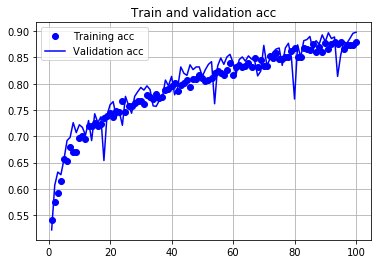

In [56]:
plt.plot(epochs,acc,'bo',label='Training acc')
plt,plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Train and validation acc')
plt.legend()
plt.grid()